In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
#from oauth2client.client import GoogleCredentials
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import os

In [4]:
print(os.getcwd())

/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone2


In [5]:
DRIVE_FOLDER = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/false/'
entries = [entry for entry in os.listdir(DRIVE_FOLDER) if os.path.isfile(os.path.join(DRIVE_FOLDER, entry))]
false_dict = {'name':[]}
for file in entries:

    false_dict['name'].append(file)
DRIVE_FOLDER = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/true/'
entries = [entry for entry in os.listdir(DRIVE_FOLDER) if os.path.isfile(os.path.join(DRIVE_FOLDER, entry))]
true_dict = {'name':[]}
for file in entries:

    true_dict['name'].append(file)


In [19]:
df1 = pd.DataFrame(false_dict)
df1['label'] = 0
df1['path'] = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/false/'

df2 = pd.DataFrame(true_dict)
df2['label'] = 1
df2['path'] = '/Users/sbezawada/Documents/Workspace/MLE-COURSE/Capstone/Data/true/'

# combine both dataframes
df = pd.concat([df1,df2])
#shuffle the labels
df = df.sample(frac=1, random_state=56).reset_index(drop=True)

print('The length of the dataset is: ', f'{df.shape[0]:,}')

labels = df['label'].unique()
df.head

The length of the dataset is:  1,435


<bound method NDFrame.head of                       name  label  \
0        Mani_false563.wav      0   
1         Maninoise615.wav      1   
2        Mani_false399.wav      0   
3     Mani_false212(1).wav      0   
4          Maninoise11.wav      1   
...                    ...    ...   
1430        Mani624(1).wav      1   
1431            Mani50.wav      1   
1432       Maninoise12.wav      1   
1433     Mani_false191.wav      0   
1434     Mani_false388.wav      0   

                                                   path  
0     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
1     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
2     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
3     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
4     /Users/sbezawada/Documents/Workspace/MLE-COURS...  
...                                                 ...  
1430  /Users/sbezawada/Documents/Workspace/MLE-COURS...  
1431  /Users/sbezawada/Documents/Workspace/MLE-COURS...  
143

The following is the distribution of labels in our data

In [8]:
df.label.value_counts()

0    738
1    697
Name: label, dtype: int64

In [30]:
i=0

wave_audio, wave_sample_rate, =librosa.load(df['path'][i] + df['name'][i])
#print(wave_audio, wave_sample_rate)

Text(0.5, 1.0, '0')

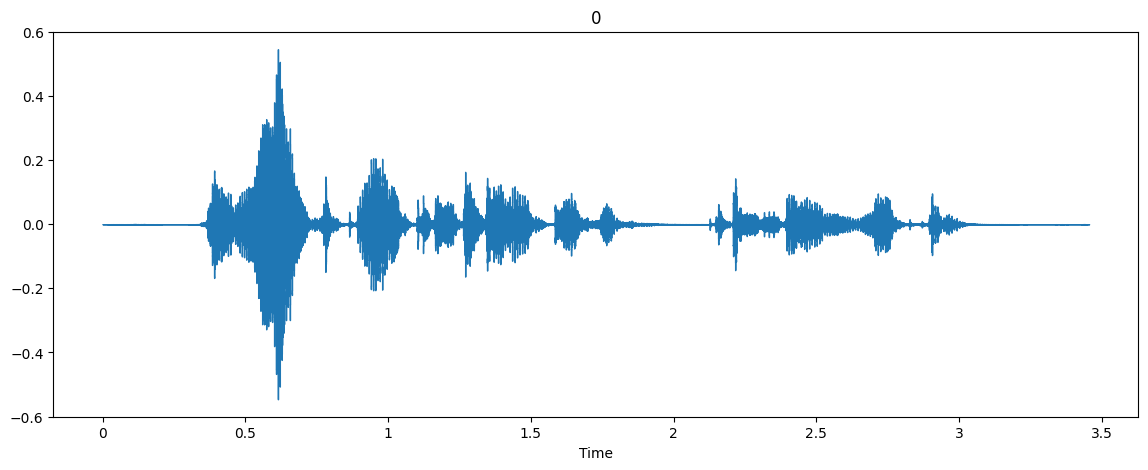

In [33]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wave_audio, sr=wave_sample_rate)
plt.title(df['label'][i])


In [36]:
i=1
wave_audio, wave_sample_rate, =librosa.load(df['path'][i] + df['name'][i])
print(wave_audio, wave_sample_rate)

[ 0.10544381  0.10643484  0.13601826 ... -0.03695938 -0.00616102
  0.        ] 22050


Text(0.5, 1.0, '1')

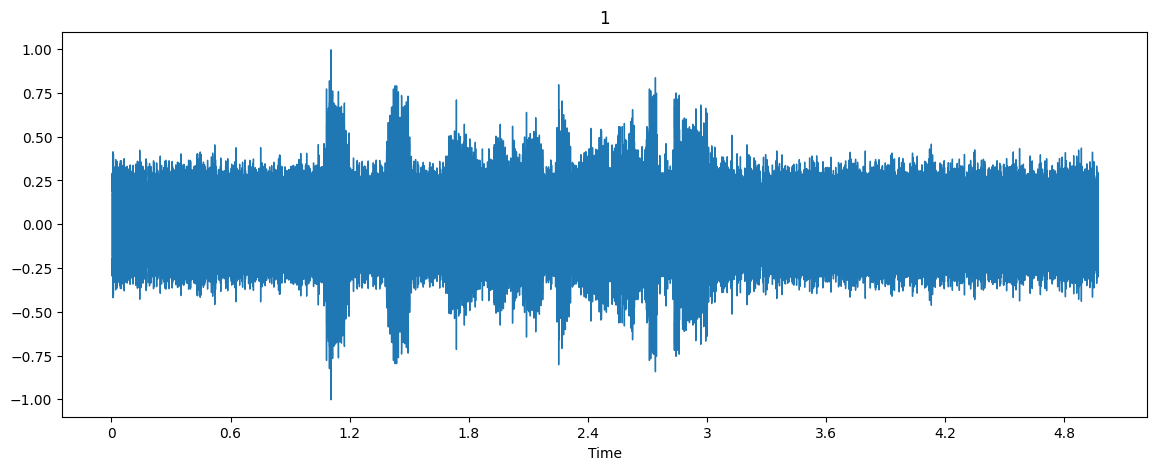

In [37]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wave_audio, sr=wave_sample_rate)
plt.title(df['label'][i])

MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound

(20, 214)


/var/folders/mt/52sww7c50ws851nqq95j74qc0000gp/T/ipykernel_18358/2388301421.py:3: FutureWarning: Pass y=[ 0.10544381  0.10643484  0.13601826 ... -0.03695938 -0.00616102
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(wave_audio, sr=wave_sample_rate)


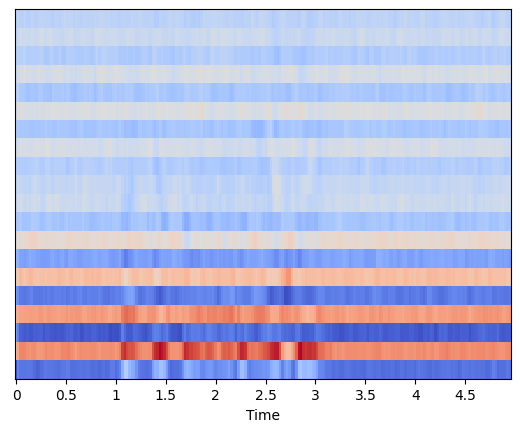

In [38]:
i=1
wave_audio, wave_sample_rate, =librosa.load(df['path'][i] + df['name'][i])
mfccs = librosa.feature.mfcc(wave_audio, sr=wave_sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=wave_sample_rate, x_axis='time')

In [39]:
mfccs

array([[-76.018776  , -55.01994   , -61.033237  , ..., -64.55922   ,
        -60.574196  , -62.327103  ],
       [ 55.69571   ,  67.74386   ,  83.50043   , ...,  78.47429   ,
         81.78206   ,  81.619446  ],
       [-37.87152   , -56.722157  , -71.832375  , ..., -75.38687   ,
        -74.185165  , -72.54881   ],
       ...,
       [ -1.7415534 ,  -3.8856807 ,  -5.115803  , ...,  -4.482865  ,
         -7.0911713 ,  -7.9021215 ],
       [  4.2973814 ,   6.817177  ,  11.369244  , ...,   8.950613  ,
          7.203162  ,  10.972771  ],
       [  0.3651726 ,   0.58322644,  -2.8535287 , ...,   2.8438132 ,
         -2.8969138 ,  -2.5009265 ]], dtype=float32)

In [ ]:
#extract for the complete dataset
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])